# Gradient boosting

## O que é?

Gradient boosting é um algoritmo de aprendizado por comitê, baseado em árvores de decisão.
Semelhante às Random Forests, o Gradient Boosting utiliza um conjunto de árvores de decisão. Partindo de um valor "aleatório" (pode ser a média de todos os valores alvo), esse algoritmo tenta predizer o a diferença entre o valor original e valor gerado anteriormente. Depois o valor gerado inicialmente é somado com o valor predito na árvore (escalonado pelo índice de aprendizado "learning rate"), consequentemente todos os valores gerados nas próximas árvores são escalonados e somados ao valor inicial. Isso diminui a diferença entre o valor inicial e o valor original.

$y_{pred} = Av+Lr*T_1 + Lr * T_2 + Lr * T_3 + ... + Lr * T_n$  ------> $y_{pred} = Av+Lr(T_1+T_2+T_3+...+T_n)$
Onde _Av_ é o valor inicial (normalmente a média dos valores alvos), _Lr_ é o coeficiente de aprendizado (0-1) e _Tn_ é o resultado previsto pela árvore n

## Exemplo

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

%matplotlib inline

### Classificação

In [45]:
# importando
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification #Gerar classes aleatórias 

from sklearn.ensemble import RandomForestClassifier

In [73]:
#Cria 5000 exemplos com 6 variáveis independentes, saída 1 ou 0
X, y = make_classification(n_samples=5000, n_features=6, shuffle=True) 

#Dividindo dados em treino e teste utilizando train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [76]:
gb = GradientBoostingClassifier(random_state=0, loss='deviance', learning_rate=0.1, n_estimators =50)
gb.fit(X_train, y_train)

sc_gb = gb.score(X_test, y_test)
print(sc_gb)

0.9144


### Regressão

In [87]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression

from sklearn.tree import DecisionTreeRegressor

In [82]:
#Gera regressão com valores aleatórios, 1000 linhas e 4 colunas além da variável alvo
X, y = make_regression(n_samples = 1000, n_features = 4, shuffle = True, random_state = 0)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

In [83]:
gbr = GradientBoostingRegressor(random_state=2, learning_rate=0.1, n_estimators =50)
gbr.fit(X_train, y_train)

sc_gbr = gbr.score(X_test, y_test)
print(sc_gbr)

0.9329638286802892


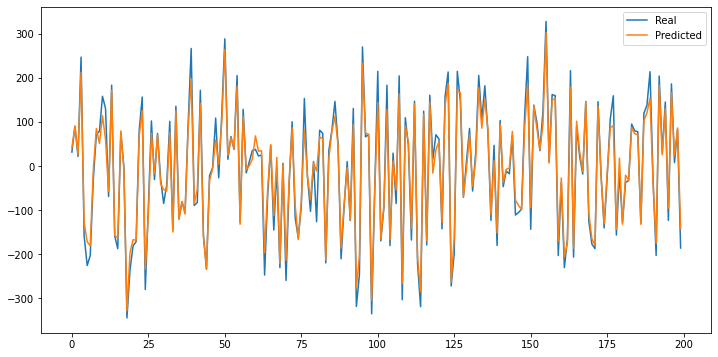

In [93]:
plt.figure(figsize=(12,6))
plt.plot(y[800:], label='Real')
plt.plot(gbr.predict(X)[800:], label='Predicted')
plt.legend()
plt.show()